## House Price Predicction Model


**Importing Necessary Libraries**

In [163]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Library to Generate Train and Test data.
from sklearn.model_selection import train_test_split as tts
#Library to Perform Linear Regression.
from sklearn.linear_model import LinearRegression
#Library for Performance Assesment.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Library to remove uncecessary waarnings messages.
import warnings
warnings.filterwarnings('ignore')

**Reading the CSV file**

In [164]:
df=pd.read_csv('Housing.csv')

**Correlation matrix**

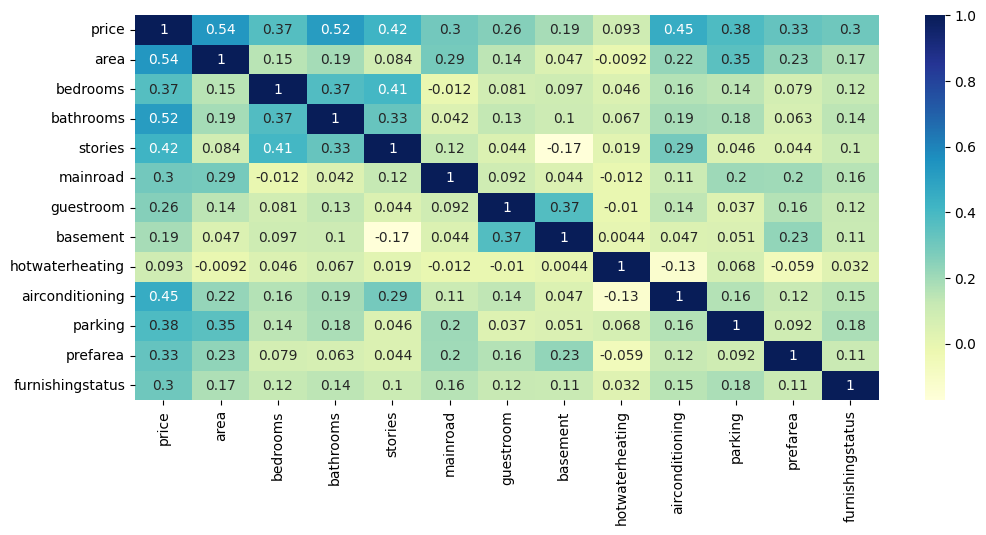

In [165]:
Housing_data=df.select_dtypes(include=['number'])
plt.figure(figsize=(12,5))
sns.heatmap(Housing_data.corr(), cmap='YlGnBu',annot=True)
plt.show()

**Setting Independent and Dependent VariableS and Generating Train and Test Data.**

In [213]:
X=df.drop(columns=['price','bedrooms'])
Y=df['price']


In [260]:
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.39,random_state=64)
print(X_train,X_test,Y_train,Y_test,sep="\n\n")

     area  bathrooms  stories  mainroad  guestroom  basement  hotwaterheating  \
369  3600          1        1         1          0         0                0   
126  7160          1        1         1          0         1                0   
281  4500          1        1         1          0         0                0   
502  3480          1        1         1          0         0                0   
97   6400          1        1         1          1         1                0   
..    ...        ...      ...       ...        ...       ...              ...   
85   8250          2        3         1          0         0                0   
54   6000          2        2         1          1         0                0   
166  7800          1        1         1          0         1                0   
119  7020          1        1         1          0         1                0   
452  9000          1        2         1          0         0                0   

     airconditioning  parki

**Perfroming Linear Regression**

In [261]:
LR=LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

**Results of Linear Regression Anlysis**

In [262]:
m=LR.coef_
b=LR.intercept_
print(f'm: {m}',f'b: {b}',sep="\n\n")

m: [2.43308948e+02 9.61889478e+05 5.32822138e+05 3.60824384e+05
 6.00698462e+05 3.00449416e+05 6.58044886e+05 9.62621761e+05
 2.18926653e+05 6.49444683e+05 6.43590052e+05]

b: -172338.0634509828


**Generating Predictions**

In [263]:
Y_predicted=LR.predict(X_test)
print(Y_predicted)
print(Y_test)
print(Y_train)

[3954784.12499675 2666166.08599836 3953821.77613291 4482660.05131942
 5496841.6365612  2206801.57810165 3739709.90186256 7442877.03446377
 8081403.98741017 5478814.24981773 3641834.96761667 5194245.5820732
 8103958.19292037 4112115.98536044 2629645.28517977 4384451.67203947
 4814969.70256001 2895990.24043514 3780497.35887102 3057790.69087807
 4998002.76861797 6512878.35241201 5182046.01684935 2477358.34232359
 4589509.80348977 4107157.81412255 5768979.1123522  3002987.45941588
 5800255.29063652 3957843.59037728 6928637.18989919 3874232.89699627
 4030478.36097313 4534952.15869607 3626943.42105037 2941732.41165075
 5266151.0566003  4358670.80135304 5622162.38578789 3469712.8288856
 3761646.43200843 3408182.51816224 5268639.5053905  5717282.72505485
 3014922.15697923 4865597.00500709 5524085.00931489 5918870.29103275
 8129244.44187651 4910113.29006159 3885695.27068326 5823988.39668213
 5382811.26434983 4788591.99040719 4778663.56858326 3332781.20288496
 3246396.33392865 3406070.29696296 3

**Evaluating the Performance**

In [264]:
print("Residual Mean Squared Error: ",np.sqrt(mean_squared_error(Y_test,Y_predicted)))
print("R-Squared                  : ",r2_score(Y_test,Y_predicted))

Residual Mean Squared Error:  1047112.7747821726
R-Squared                  :  0.6591240908662936
